In [1]:
import numpy as np
import tensorflow as tf

tf.random.set_seed(42)

tf.__version__

2025-04-14 13:03:17.291007: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 13:03:17.356110: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 13:03:17.358384: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-04-14 13:03:17.358394: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

'2.11.0'

In [2]:
X = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ]
)
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
y = np.array([
    [1],
    [0],
    [0],
    [1],
])
y

array([[1],
       [0],
       [0],
       [1]])

In [4]:
X = tf.convert_to_tensor(X, dtype=tf.float32, name='X')
y = tf.convert_to_tensor(y, dtype=tf.float32, name='y')

2025-04-14 13:05:09.265708: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-04-14 13:05:09.270860: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-04-14 13:05:09.270901: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2025-04-14 13:05:09.270923: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2025-04-14 13:05:09.270943: W tensorflow/c

In [8]:
neuronios_entrada = 2
neuronios_oculta = 3
neuronios_saida = 1

In [9]:
W = {
    'oculta': tf.Variable(
        tf.random.normal(
            [neuronios_entrada, neuronios_oculta],
            name = 'w_oculta',
        )
    ),
    'saida': tf.Variable(
        tf.random.normal(
            [neuronios_oculta, neuronios_saida],
            name = 'w_saida',
        )
    ),
}

In [10]:
type(W)

dict

In [11]:
type(W['oculta'])

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [12]:
W['oculta']

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.08422458, -0.86090374,  0.37812304],
       [-0.00519627, -0.49453196,  0.6178192 ]], dtype=float32)>

In [13]:
W['saida']

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.55909735],
       [-0.5347214 ],
       [ 2.3730333 ]], dtype=float32)>

<Axes: ylabel='Density'>

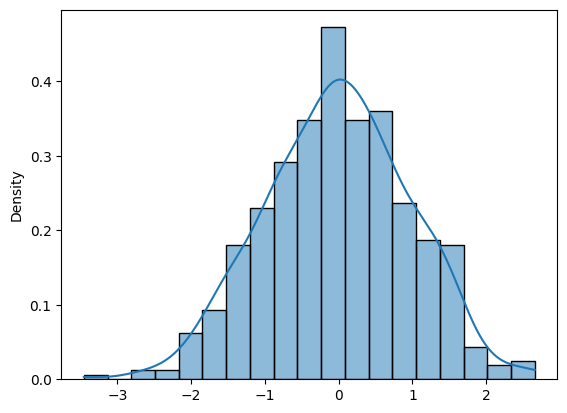

In [21]:
distribuicao = np.random.normal(size=500)
import seaborn as sns
sns.histplot(distribuicao, kde=True, stat="density")

In [22]:
b = {
    'oculta': tf.Variable(tf.random.normal([neuronios_oculta]), name='b_oculta'),
    'saida': tf.Variable(tf.random.normal([neuronios_saida]), name='b_saida'),
}

In [24]:
otimizador = tf.keras.optimizers.SGD(learning_rate=0.3)

for epoca in range(10_000):

    with tf.GradientTape() as tape:
        camada_oculta = tf.add(tf.matmul(X, W['oculta']), b['oculta'])
        camada_oculta_ativacao = tf.sigmoid(camada_oculta)
        camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, W['saida']), b['saida'])
        camada_saida_ativacao = tf.sigmoid(camada_saida)
        erro = tf.keras.losses.MSE(y, camada_saida_ativacao)

    var_list = [
        W['oculta'],
        W['saida'],
        b['oculta'],
        b['saida'],
    ]

    gradientes = tape.gradient(erro, var_list)

    otimizador.apply_gradients(zip(gradientes, var_list))

    if epoca % 200 == 0:
        erro_medio = tf.reduce_mean(erro).numpy()
        print(erro_medio)


0.3220464
0.24903727
0.2353735
0.1525687
0.035297062
0.011265448
0.0060558077
0.004022341
0.0029742648
0.002344248
0.0019270438
0.0016318206
0.0014125959
0.0012437445
0.001109912
0.0010013604
0.0009116299
0.00083627435
0.00077213504
0.00071690755
0.00066887634
0.00062673783
0.0005894796
0.0005563085
0.0005265954
0.00049983105
0.00047560254
0.0004535672
0.00043344562
0.00041499885
0.000398029
0.00038236694
0.00036786913
0.0003544097
0.0003418845
0.00033019733
0.00031927045
0.00030903085
0.00029941712
0.00029037357
0.00028185095
0.00027380625
0.00026620197
0.00025900186
0.00025217328
0.0002456908
0.00023952863
0.00023366229
0.00022807336
0.0002227413


In [25]:
W

{'oculta': <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 5.447239 , -6.4777393, -3.5317693],
        [ 5.5995836,  3.944753 ,  6.276525 ]], dtype=float32)>,
 'saida': <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
 array([[-6.410737],
        [-9.259571],
        [ 9.271779]], dtype=float32)>}

In [26]:
b

{'oculta': <tf.Variable 'b_oculta:0' shape=(3,) dtype=float32, numpy=array([-1.432679 , -1.3138111,  0.9690788], dtype=float32)>,
 'saida': <tf.Variable 'b_saida:0' shape=(1,) dtype=float32, numpy=array([1.4729552], dtype=float32)>}

In [28]:
camada_oculta_teste = tf.add(tf.matmul(X, W['oculta']), b['oculta'])
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)
camada_saida_teste = tf.add(tf.matmul(camada_oculta_ativacao_teste, W['saida']), b['saida'])
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

In [29]:
camada_saida_ativacao_teste

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.9932907 ],
       [0.01459556],
       [0.0153031 ],
       [0.98054844]], dtype=float32)>